# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# read the data
df = pd.read_csv('foodhub_order.csv')

# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [4]:
# return the last 5 rows
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


#### Observations:
- The DataFrame is made up of 9 columns, detailed in the Data Dictionary. Every row represents an order that a customer has placed

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
#df.shape
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### Q1 Observations:
The data has
*   1898 rows
*   9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [8]:
# Check some more information on columns
uniqueRestaurantNameCount = df['restaurant_name'].nunique()
uniqueCuisineType = df['cuisine_type'].unique()
uniqueCuisineTypeCount = df['cuisine_type'].nunique()
uniqueDaysOfTheWeek = df['day_of_the_week'].unique()
uniqueRating = df['rating'].unique()

print("Unique Restaurent Names:- ", uniqueRestaurantNameCount)
print("Unique Cuisine Type:- ", uniqueCuisineType)
print("Unique Cuisine Type Count:- ", uniqueCuisineTypeCount)
print("Unique Days of the week:- ", uniqueDaysOfTheWeek)
print("Unique Rating:- ", uniqueRating)

Unique Restaurent Names:-  178
Unique Cuisine Type:-  ['Korean' 'Japanese' 'Mexican' 'American' 'Indian' 'Italian'
 'Mediterranean' 'Chinese' 'Middle Eastern' 'Thai' 'Southern' 'French'
 'Spanish' 'Vietnamese']
Unique Cuisine Type Count:-  14
Unique Days of the week:-  ['Weekend' 'Weekday']
Unique Rating:-  ['Not given' '5' '3' '4']


#### Q2 Observations:

- The dataset includes various attribute types, such as float, int, and object.
- There are no missing or null values across all columns.
- It encompasses data from 178 restaurants.
- There are 14 distinct types of cuisine featured.
- The days of the week are classified into 'Weekend' and 'Weekday'.
- Ratings are distinctly categorized into 'Not given', '3', '4', and '5'.





### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [9]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [10]:
#Checking rating to see if there is any rows with no rating.
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [11]:
df.duplicated().any()

False

#### Q3 Observations:

- All columns in the dataset are complete, with no missing values, removing the necessity for missing value treatment.
- A number of rows are marked with ratings as "Not given," which will require future attention and conversion of the column to an integer format for numerical analysis.
- The dataset is free of duplicate entries, eliminating the need for their deletion.




  


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Q4 Observations:

After placing an order, the "Food Preparation Time" statistics are as follows:

- The shortest preparation time is 20 minutes.
- The longest preparation time is 35 minutes.
- On average, food preparation takes 27.37 minutes.

For orders:

- The average cost is $16.5, with a median cost of $14.4, and the prices vary between $4.47 and $35.41.


Regarding delivery times:

- On average, delivery takes 24 minutes, with a median time of 25 minutes, and delivery times range from 15 to 33 minutes.


Noteworthy points:

- "Shake Shack" is identified as the most popular restaurant.
- "American" cuisine is the most common type of food served.
- Restaurants see the highest number of orders during the "Weekends."



### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here

# for my testing please ignore
# df['rating'].nunique()
# df['rating'].value_counts()

ratingNotGiveCount = (df['rating'] == 'Not given').sum()
totalOrders = df.shape[0]


print("There are", ratingNotGiveCount, 'orders which are not rated out of', totalOrders, "total order.")
print("% of orders what are not rated ", round(ratingNotGiveCount/totalOrders * 100, 2), "%", sep='')

There are 736 orders which are not rated out of 1898 total order.
% of orders what are not rated 38.78%


#### Q5 Observations:
*   There are **736** orders which are not rated out of **1898** total orders.
*   Percent of orders that are not rated: **38.78%**

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### Q6 Univariate Analysis
Checking all Columns and Counts

##### Q6.1 Order ID



In [ ]:
# check unique order ID
print("Count of Unique OrderIDs:", df['order_id'].nunique() )

Count of Unique OrderIDs: 1898


###### Q6.1 Observations
*   There are a total or 1898 unique orders, which matches the no of entries in dataset, that means each order is unique entry.
*   This column can be used as primary key in database or table.

##### Q6.2 Customer ID

Unique Customers [337525 358141  66393 ...  97838 292602 397537]

Total Unique Customers:1200

Customers by Order Count
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
335897     1
377481     1
125542     1
288808     1
397537     1
Name: customer_id, Length: 1200, dtype: int64




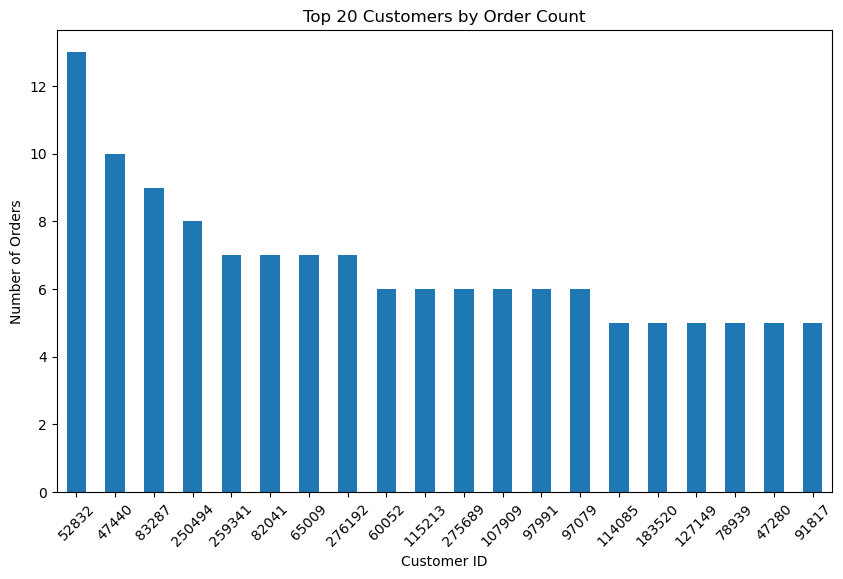

In [ ]:
#Analysis 1
# List of Unique customer IDs
print("Unique Customers", df['customer_id'].unique())

#Analysis 2
# Total Unique Customer IDs
print("\nTotal Unique Customers:", df['customer_id'].nunique(), sep='')

#Analysis 3
# List of Customer ID's and How many times they have ordered, sorted.
## Count how many times each customer has ordered
customer_order_counts = df['customer_id'].value_counts()

## Sort the counts in descending order to see the most frequent customers at the top
sorted_customer_order_counts = customer_order_counts.sort_values(ascending=False)

## Display the sorted list
print("\nCustomers by Order Count\n", sorted_customer_order_counts, sep='')
print("\n")
#Analysis 4
# Plot Histogram for Top 20Customer Order Counts
## Calculate the frequency of each order count (i.e., how many customers have each order count)
order_count_frequency = sorted_customer_order_counts.value_counts().sort_index()

## Plotting a bar plot with order counts on the y-axis
top_n = 20
top_customers = sorted_customer_order_counts.head(top_n)

plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar')
plt.title(f'Top {top_n} Customers by Order Count')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)  # Rotate the customer IDs for better readability
plt.show()

###### Q6.2 Observations:
*   There are total of 1200 unique customers and there are 1898 unique orders, so there are some customers who ordered more than once.
*   Histogram shows top 20 customers who has ordered more than once.

##### Q6.3 Restaurant Name

In [ ]:
# check unique Restaurant Name
print("Datatype of Column Restaurant Name:", df['restaurant_name'].dtype)
print("\nRestaurent Names", df['restaurant_name'].unique())  ## Complete the code to find out number of unique Restaurant Name
print("\nTotal Restaurent Count:", df['restaurant_name'].nunique())

Datatype of Column Restaurant Name: object

Restaurent Names ['Hangawi' 'Blue Ribbon Sushi Izakaya' 'Cafe Habana'
 'Blue Ribbon Fried Chicken' 'Dirty Bird to Go' 'Tamarind TriBeCa'
 'The Meatball Shop' 'Barbounia' 'Anjappar Chettinad' 'Bukhara Grill'
 'Big Wong Restaurant \x8c_¤¾Ñ¼' 'Empanada Mama (closed)' 'Pylos'
 "Lucky's Famous Burgers" 'Shake Shack' 'Sushi of Gari' 'RedFarm Hudson'
 'Blue Ribbon Sushi' 'Five Guys Burgers and Fries' 'Tortaria'
 'Cafe Mogador' 'Otto Enoteca Pizzeria' 'Vezzo Thin Crust Pizza'
 'Sushi of Gari 46' 'The Kati Roll Company' 'Klong' '5 Napkin Burger'
 'TAO' 'Parm' 'Sushi Samba' 'Haru Gramercy Park'
 'Chipotle Mexican Grill $1.99 Delivery' 'RedFarm Broadway' 'Cafeteria'
 'DuMont Burger' "Sarabeth's East" 'Hill Country Fried Chicken' 'Bistango'
 "Jack's Wife Freda" "Mamoun's Falafel" 'Prosperity Dumpling'
 'Blue Ribbon Sushi Bar & Grill' 'Westville Hudson' 'Blue Ribbon Brooklyn'
 'Nobu Next Door' 'Osteria Morini' 'Haandi' 'Benihana' 'Han Dynasty'
 'Chote Naw

###### Q6.3 Observations:
*   There are 178 different restaurents which customers order from.
*   There are special characters in the Restaurent Names, for example 'Big Wong Restaurant \x8c_¤¾Ñ¼' and 'Joe's Shanghai \x8e_À\x8eü£¾÷´'
*   Datatype is Object, so it hold more general than strings, like missing data, and enables string-specific methods like '.str'





##### Q6.4 Cuisine Type

Different Cuisine Types: ['Korean' 'Japanese' 'Mexican' 'American' 'Indian' 'Italian'
 'Mediterranean' 'Chinese' 'Middle Eastern' 'Thai' 'Southern' 'French'
 'Spanish' 'Vietnamese']

Total Cuisine Types: 14

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64



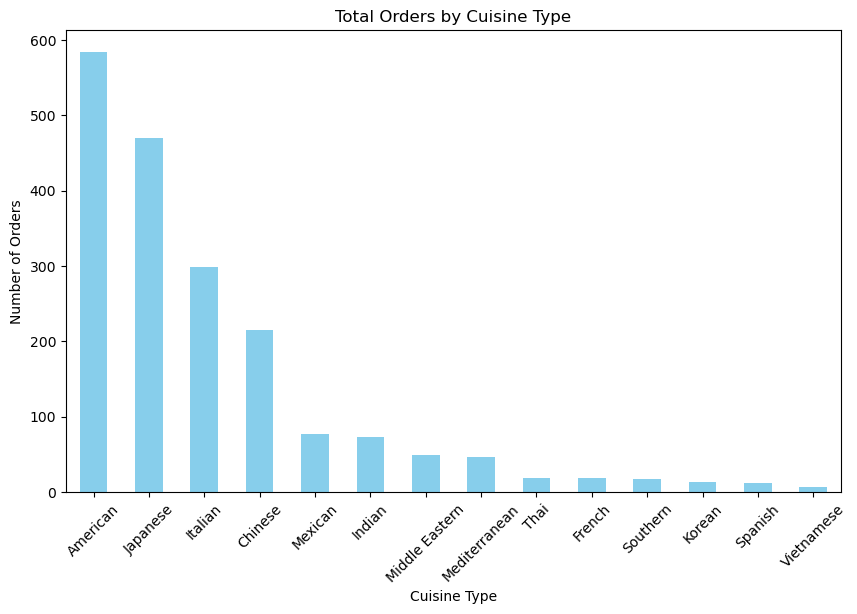

In [ ]:
# Different Cuisine Type
print("Different Cuisine Types:",df['cuisine_type'].unique())
# Total Cusine Types
print("\nTotal Cuisine Types:", df['cuisine_type'].nunique())

# Calculate total orders for each cuisine type
total_orders_by_cuisine = df['cuisine_type'].value_counts()
# Display the result
print("\n", total_orders_by_cuisine, "\n",  sep='')

#Plot Bar Graph
total_orders_by_cuisine.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Total Orders by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


###### Q6.4 Observations:

*   There are 14 different type of Cusine Types which customer use to order food from.
*   American, Japanese, italian and Chinese got most orders.
*   Vietnamese got the least orders (7).










##### Q6.5 Cost of Orders

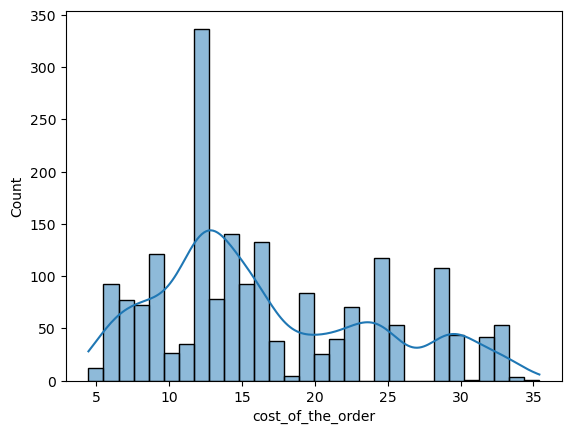

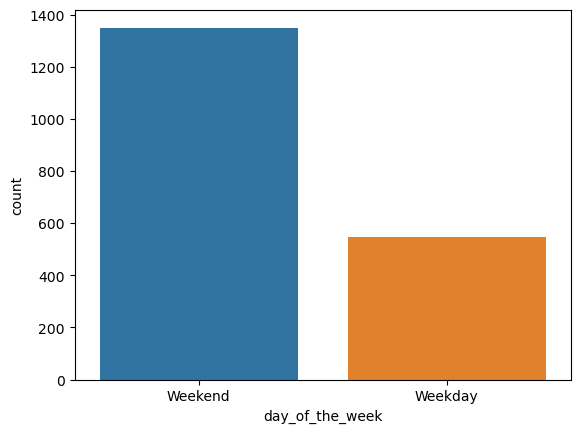

In [ ]:
# Histogram for cost_of_the_order
sns.histplot(df['cost_of_the_order'], bins=30, kde=True)
plt.show()

# Countplot for day_of_the_week
sns.countplot(x='day_of_the_week', data=df)
plt.show()

###### Q6.5 Observations:

*   **Distribution of Cost of the Order**: The histogram shows that the cost of orders is right-skewed, indicating that most orders are on the lower end of the cost spectrum, with fewer orders having a higher cost.

*   **Count of Orders by Day of the Week**: The countplot indicates the frequency of orders placed on weekdays versus weekends. Weekend orders are more than weekdays.

##### Q6.6 Rating



Unique Rating Values: ['Not given' '5' '3' '4'] 



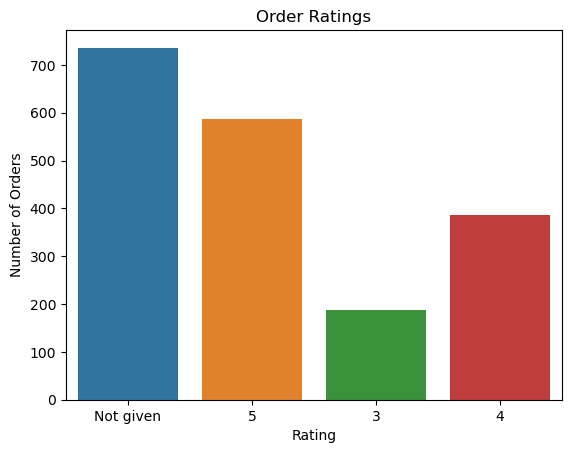

In [ ]:
# Rating Unique Values
# Note the value 'Not given' is fixed with nan in Question3
print("Unique Rating Values:",df['rating'].unique(), "\n")

sns.countplot(data = df, x = 'rating')
plt.title('Order Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Orders')
plt.show()


cuisine_type
American          4.298913
Chinese           4.338346
French                 4.3
Indian                4.54
Italian           4.360465
Japanese          4.373626
Korean            4.111111
Mediterranean      4.21875
Mexican           4.416667
Middle Eastern    4.235294
Southern          4.307692
Spanish           4.833333
Thai              4.666667
Vietnamese             4.0
Name: rating, dtype: Float64 



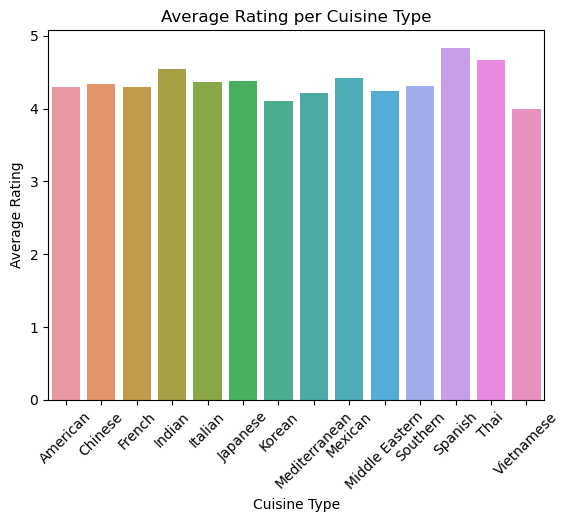

In [ ]:
# Make a copy so and convert the rating to int after replacing 'Not given' with NAN
# and 'ratings' is the column containing numeric ratings
df_rating_int = df.copy()
df_rating_int['rating'] = df_rating_int['rating'].replace('Not given',np.nan)
df_rating_int['rating'] = df_rating_int['rating'].astype('Int64')

#print(df_rating_int, "\n")

# Group the DataFrame by 'cuisine_type' and calculate the average 'rating'
average_rating_per_cuisine = df_rating_int.groupby('cuisine_type')['rating'].mean()

# The result is a Series where the index is the cuisine types and the values are the average ratings
print(average_rating_per_cuisine, "\n")

# plot barchart
sns.barplot(y=average_rating_per_cuisine.values, x=average_rating_per_cuisine.index)

# Adding title and labels to the plot
plt.title('Average Rating per Cuisine Type')
plt.ylabel('Average Rating')
plt.xlabel('Cuisine Type')
plt.xticks(rotation=45)

# Show the plot
plt.show()

###### Q6.6 Conclutions:

*   Most of the orders are not rated i.e "Not given".
*   People who are more satisfied have given ratings.
*   Ave Rating per Cusine Type shows uniform rating.

Findings: generally peole who are not happy, they go and give a bad review online, but the above information shows that there is some stratergy of foodhub to get reviews from satisfied customers.

##### Q6.7 Day Of the Week

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64 



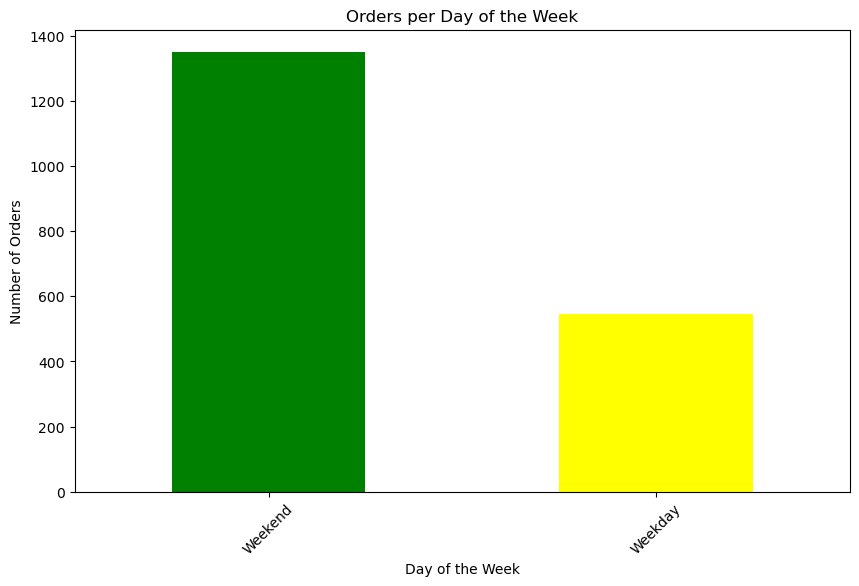

In [ ]:

# Calculate the number of orders per day of the week
orders_per_day = df['day_of_the_week'].value_counts()

print(orders_per_day, "\n")

#Plot Bar Graph
colors = ['green', 'yellow']
orders_per_day.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Orders per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)  # Rotate day names for better readability
plt.show()


###### Q6.7 Conclutions:

*   There are only two days of the week - Weekend and Weekday.
*   More orders came in on Weekend.

##### Q6.8 Food Preparation Time

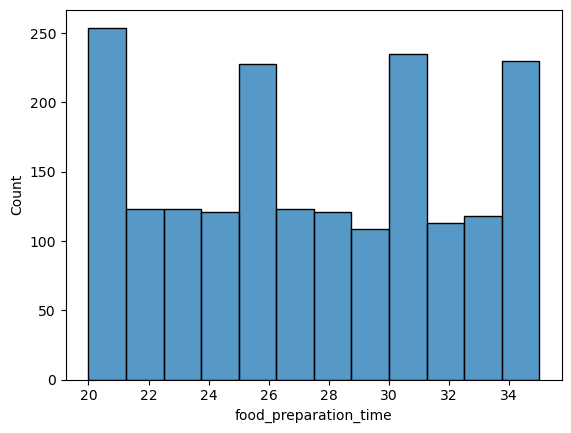

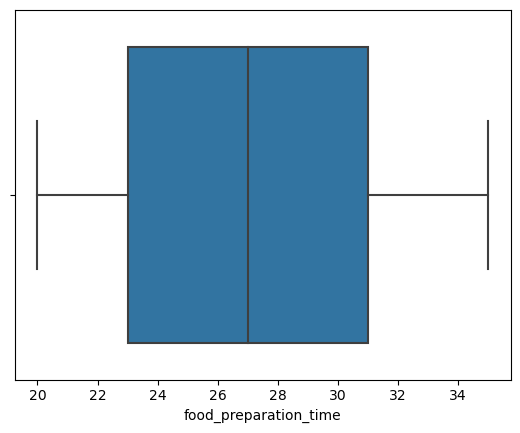

Mean: 27


In [ ]:
# Histplot of Food Preparation Time
sns.histplot(data=df,x='food_preparation_time')
plt.show()

# Boxplot of Food Preparation Time
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

#Calculate Actual Mean of Food Preparation Time
print("Mean:",round(df['food_preparation_time'].mean()))

###### Q6.8 Observations:
*   Mean is 27 mins
*   Min time to prepare food is 20 mins   
*   Max time to prepare food is ~35 mins
*   Boxplot of Food Preparation Time: The boxplot for food preparation time shows a relatively uniform distribution across the interquartile range, with minimum and maximum values indicating that preparation times are consistent across orders.   





##### Q6.9 Delivery Time

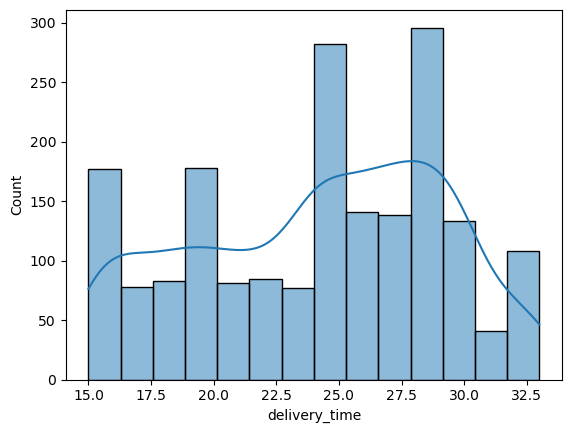

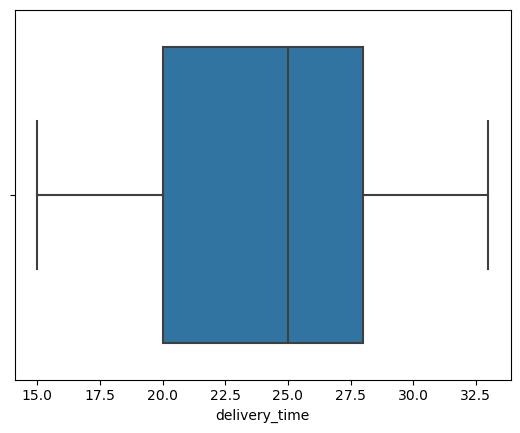

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

In [ ]:
# Histplot of Delivery Time
sns.histplot(data=df,x='delivery_time', kde=True)
plt.show()

# Boxplot of Delivery Time
sns.boxplot(data=df,x='delivery_time')
plt.show()

# Delivery times on different weekdays
# Calculate the mean delivery time for weekdays and weekends
mean_delivery_times = df.groupby('day_of_the_week')['delivery_time'].mean()
mean_delivery_times

###### Q6.9 Observations:

*   Boxplot of Delivery Time: Similar to the food preparation time, the delivery time also shows a consistent distribution across orders, with some outliers indicating occasional delays.
*   From HistPlot the data is sligtly left skewed
*   The delivery time on weekends is less than on weekdays, that means there is

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
# Get top 5 restaurants who have max numnber of orders
df['restaurant_name'].value_counts().head(5)


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Q7 Observations:


*   Above is the top 5 restaurents which got most orders
*   Shake Shack has the most orders



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here

weekend_orders = df[df['day_of_the_week'] == 'Weekend']
weekend_orders['cuisine_type'].value_counts().idxmax()


'American'

#### Q8 Observations:

*   **American** is the most popular cuisine on weekends.




### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
#Calculate Orders above 20
orders_above_20 = df[df['cost_of_the_order'] > 20].shape[0]

#Total Orders
total_orders = df.shape[0]

# Calcualte %
percentage_above_20 = round((orders_above_20 / total_orders) * 100, 2)

#print
print("Orders above $20 are", orders_above_20, "out of total orders", total_orders)
print("Percentage of orders more than $20 1i ", percentage_above_20, "%", sep='')


Orders above $20 are 555 out of total orders 1898
Percentage of orders more than $20 1i 29.24%


#### Q9 Observations:

*   There are total of 1898 orders and **555** of them are above $20 which is equal to **29.24%**.



### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here

# Mean delivery time
round(df['delivery_time'].mean(),2)

24.16

#### Q10 Observations:

*   The mean order delivery time is **24.16 mins**.





### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
df['customer_id'].value_counts().head(3)


52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Q11 Observations:

*   The customer IDs of top 3 customers are 52832, 47440, 83287.




### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


##### Q12.1 Food Preparation Time by Cuisine Type

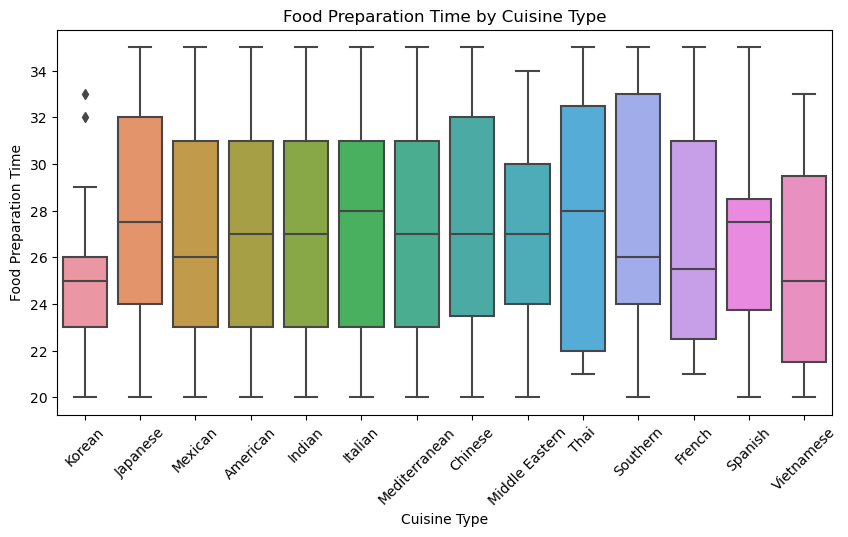

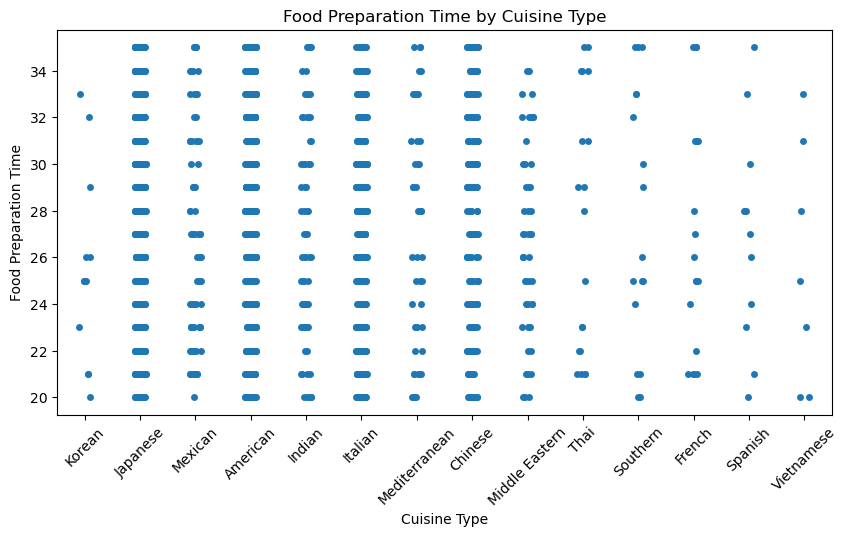

In [ ]:
# Write the code here

# Relation between Food Preparation Time by Cuisine Type
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.xticks(rotation=45)
plt.title('Food Preparation Time by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time')
plt.show()

print("\n")
plt.figure(figsize=(10,5))
sns.stripplot(data=df, x='cuisine_type', y ='food_preparation_time')
plt.xticks(rotation=45)
plt.title('Food Preparation Time by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time')
plt.show()

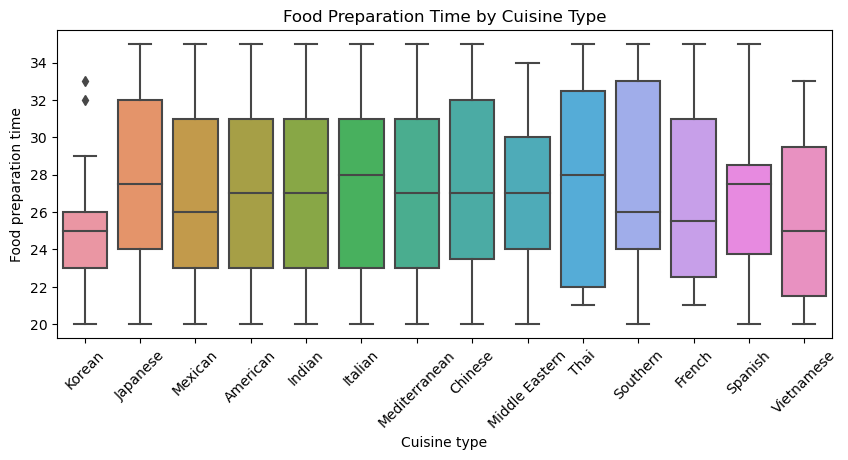

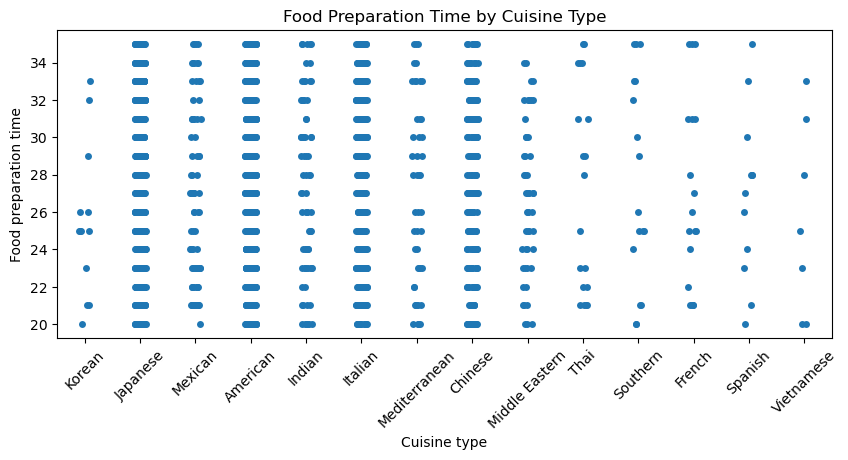

In [ ]:
#Optimized code for above, just trying out some optimization

# Define common plot aesthetics and settings outside the function
figsize = (10, 4)
rotation = 45
title = 'Food Preparation Time by Cuisine Type'

# Function to plot either a boxplot or a stripplot based on provided x and y variables
def plot_preparation_time_by_type(kind, x, y, data):
    plt.figure(figsize=figsize)
    plot_func = sns.boxplot if kind == 'boxplot' else sns.stripplot
    plot_func(x=x, y=y, data=data)
    plt.xticks(rotation=rotation)
    plt.title(title)
    plt.xlabel(x.capitalize().replace('_', ' '))  # Beautify the x-label
    plt.ylabel(y.capitalize().replace('_', ' '))  # Beautify the y-label
    plt.show()

# Example usage
plot_preparation_time_by_type('boxplot', 'cuisine_type', 'food_preparation_time', df)
print("\n")  # Space between plots for clarity
plot_preparation_time_by_type('stripplot', 'cuisine_type', 'food_preparation_time', df)

###### Q12.1 Obeservations:

*   Mexican, American, Indian, Italian and Mediterranean have same IQ range.
*   From stripplot we see Vietnamese and Korean has less orders.
*   Korean hase some outliers in food preparation time as per the boxplot.
*   Korean has a outliers according to BoxPlot.







##### Q12.2 Cuisine Type vs. Cost of the Order

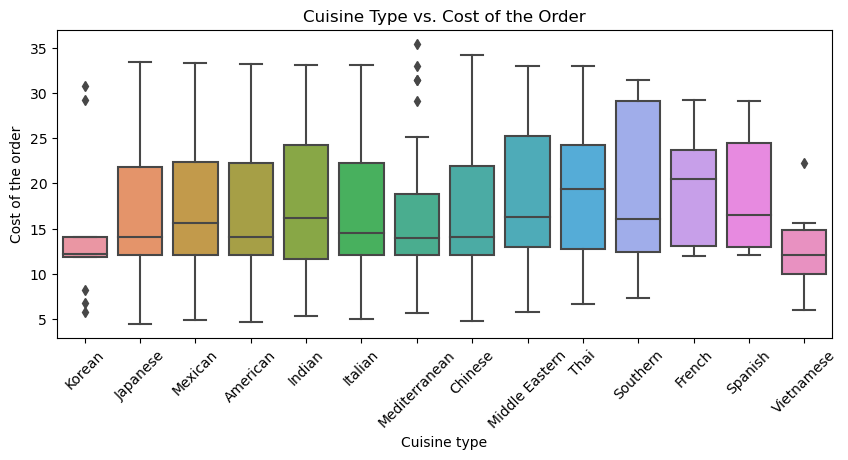

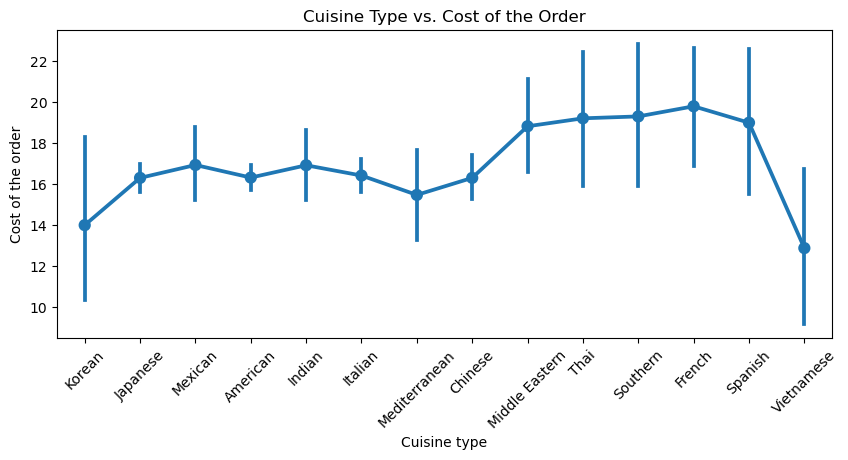

In [ ]:
# Define common plot aesthetics and settings outside the function
figsize = (10, 4)
rotation = 45
title = 'Cuisine Type vs. Cost of the Order'

# Function to plot either a boxplot or a pointplot based on provided x and y variables
def plot_preparation_time_by_type(kind, x, y, data):
    plt.figure(figsize=figsize)
    plot_func = sns.boxplot if kind == 'boxplot' else sns.pointplot
    plot_func(x=x, y=y, data=data)
    plt.xticks(rotation=rotation)
    plt.title(title)
    plt.xlabel(x.capitalize().replace('_', ' '))  # Beautify the x-label
    plt.ylabel(y.capitalize().replace('_', ' '))  # Beautify the y-label
    plt.show()

# Example usage
plot_preparation_time_by_type('boxplot', 'cuisine_type', 'cost_of_the_order', df)
print("\n")  # Space between plots for clarity
plot_preparation_time_by_type('pointplot', 'cuisine_type', 'cost_of_the_order', df)

###### Q12.2 Obeservations:

*   top 5 cusine which are expensive are Middle Eastern, Thai, Southern, French, Spanish.
*   Frensh is expensive in ave, according to pointplot
*   Vietnamese has least ave cost compared to all other
*   Korean, Mediterranean and Vietnamese has few outliners
*   Vietnamese cuisine order can go as low as $5 and Southern cuisine order can go as high as $23


##### Q12.3 Cuisine Type vs. Delivery Time


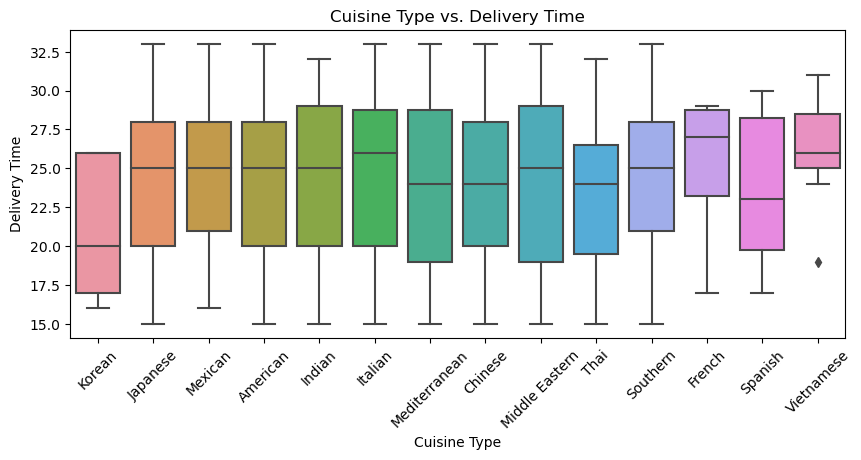

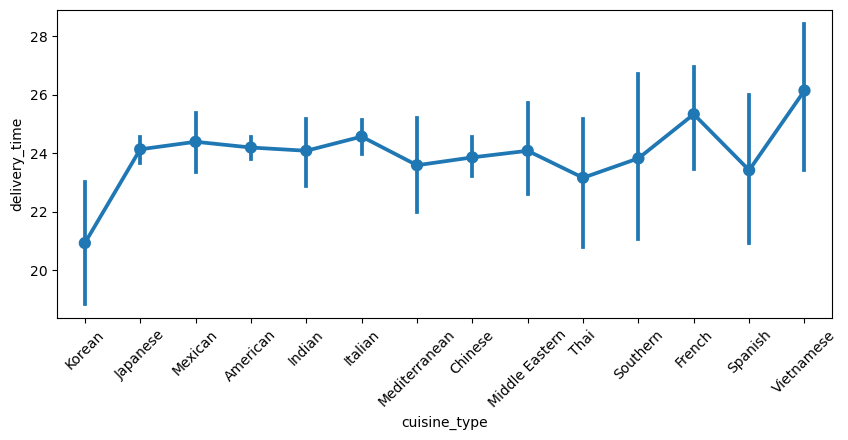

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='cuisine_type', y='delivery_time')
plt.xticks(rotation=45)
plt.title('Cuisine Type vs. Delivery Time')
plt.xlabel('Cuisine Type')
plt.ylabel('Delivery Time')
plt.show()

print("\n")
plt.figure(figsize=(10, 4))
sns.pointplot(x = 'cuisine_type', y = 'delivery_time', data = df)
plt.xticks(rotation=45)
plt.show()

###### Q12.3 Observations:

Here are the points corrected for grammar and spelling:

- Korean cuisine has the fastest delivery time compared to all other cuisine types.
- Vietnamese cuisine has the longest average delivery time compared to all others.
- Vietnamese cuisine has an outlier, as indicated by the BoxPlot.
- According to the point plot, Korean cuisine took less time to deliver, and Vietnamese cuisine took more time to deliver. However, the data points for both are limited, and the difference in time is very slight.







##### Q12.4 Day of the week vs Delivery Time

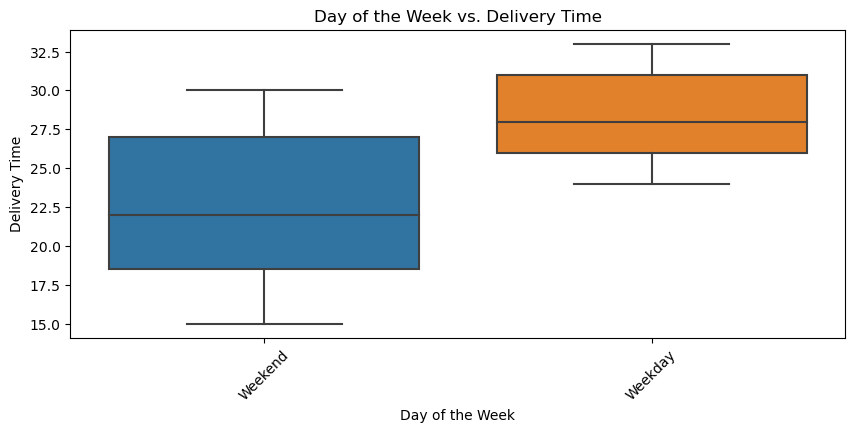

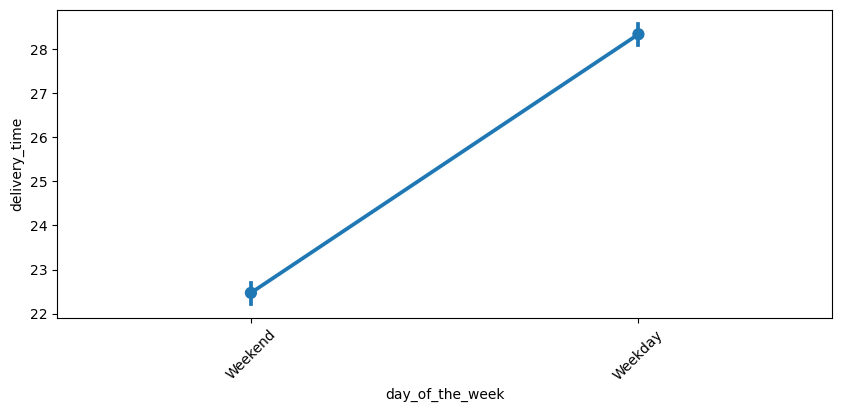

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.xticks(rotation=45)
plt.title('Day of the Week vs. Delivery Time')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time')
plt.show()

print("\n")
plt.figure(figsize=(10, 4))
sns.pointplot(x = 'day_of_the_week', y = 'delivery_time', data = df)
plt.xticks(rotation=45)
plt.show()

###### Q12.4 Obeservations:
- The average time to deliver food is more on weekdays than on weekends
- 50% of orders on weekend are delivered approximately between 18 and 27 minutes
- The difference of IQR on weekeday is less than difference of IQR on weekend
- Min delivery time on weekday is greater than ave delivery time on weekend - according to boxplot.

##### Q12.5 Cuisine Popularity by Day of the Week


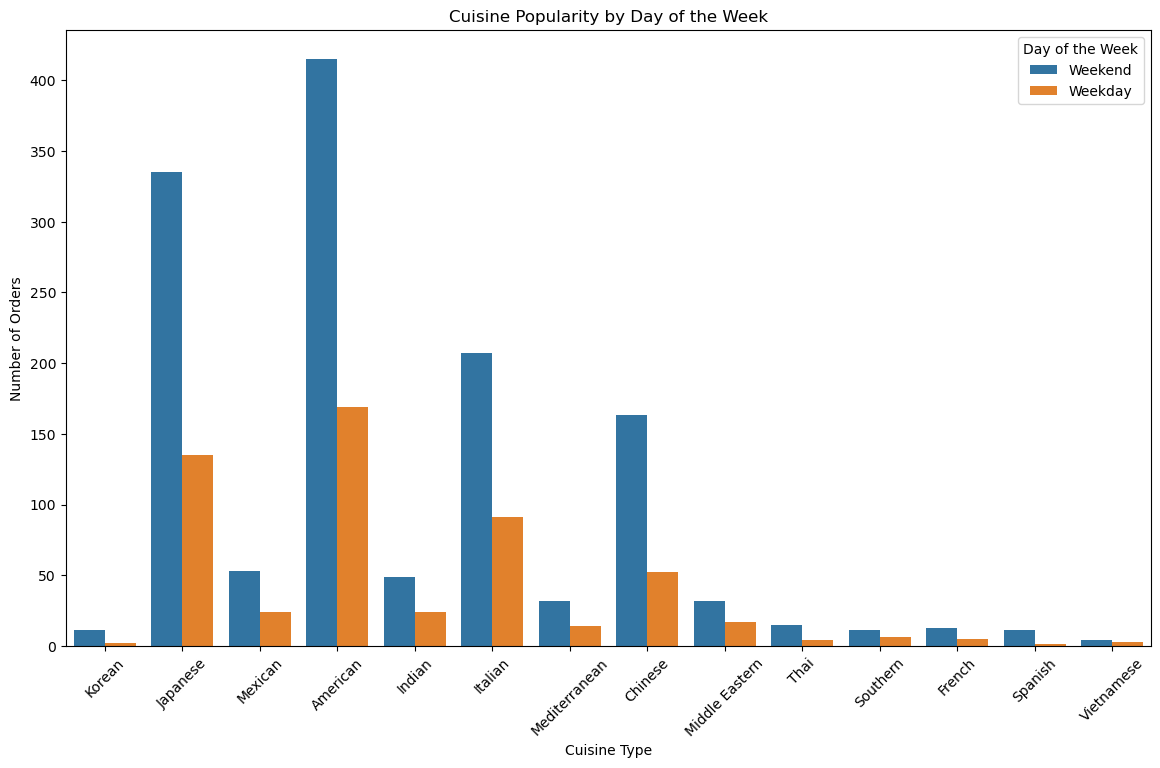

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week')
plt.xticks(rotation=45)
plt.title('Cuisine Popularity by Day of the Week')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.legend(title='Day of the Week')
plt.show()


###### Q12.5 Observations:

- Weekends have more than double the orders compared to weekdays.
- American, Japanese, Italian and Chinese have more orders compared to all other cusine types.
- Vietnamese has leaset orders
- Korean, Thai, Southern, French, Spanish and Vietnamese has least orders on weekends and weekdays.



##### Q12.6 Correlation Analysis Among Numerical Variables for Each Cuisine

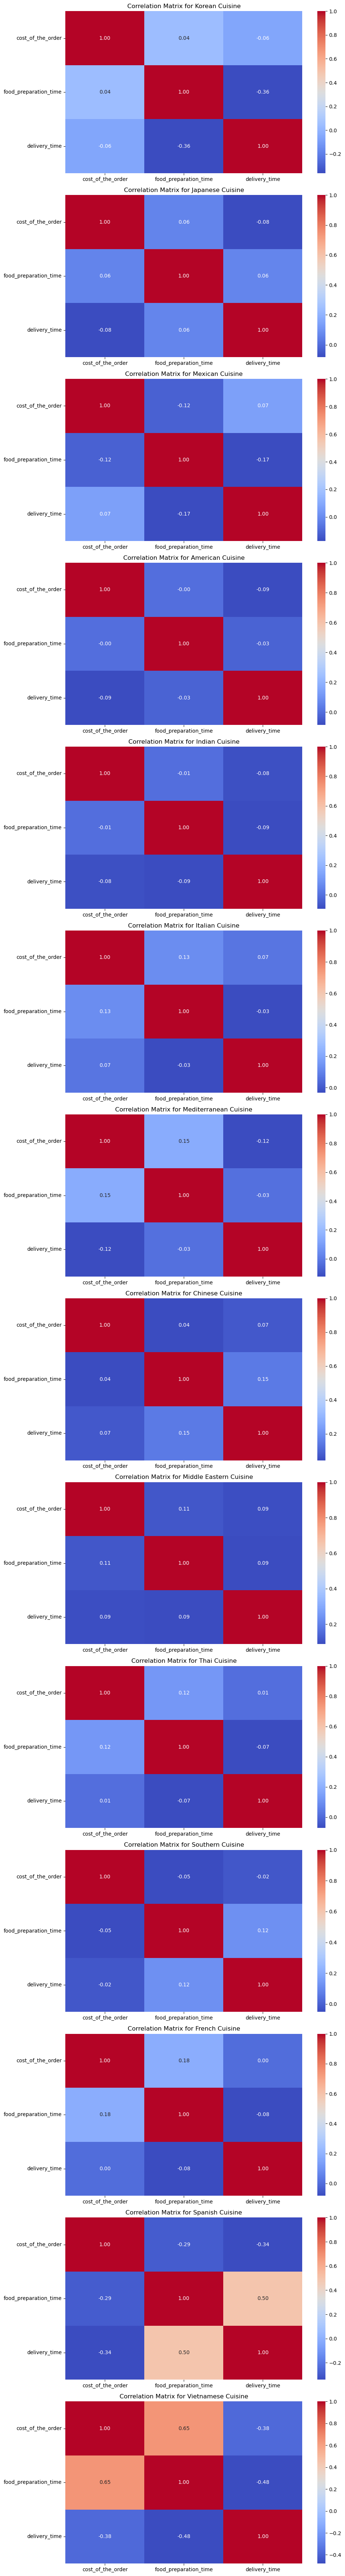

In [ ]:
# Getting unique cuisine types
cuisine_types = df['cuisine_type'].unique()

# Setting up the matplotlib figure for a grid of heatmaps
fig, axs = plt.subplots(len(cuisine_types), 1, figsize=(10, 5 * len(cuisine_types)))

# Ensure there is only one axis for a single cuisine to avoid indexing errors if there's only one axis
if len(cuisine_types) == 1:
    axs = [axs]

for ax, cuisine in zip(axs, cuisine_types):
    # Filter the DataFrame for the current cuisine type
    temp_df = df[df['cuisine_type'] == cuisine]

    # Calculate the correlation matrix
    corr = temp_df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr()

    # Generate a heatmap for the correlation matrix
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', ax=ax)

    # Setting the title for each subplot
    ax.set_title(f'Correlation Matrix for {cuisine} Cuisine')

plt.tight_layout()
plt.show()



###### Q12.6 Observations:
Checking if there is a correlation between Cusine Type and other numerical valuse like Cost, Preparation time, Delivery time.


*   Did not find any major correlation, but worth the coding to test it out.



##### Q12.7 Relationships between all numerical variables and how they are distributed across categories of a categorical variable


<Figure size 1000x600 with 0 Axes>

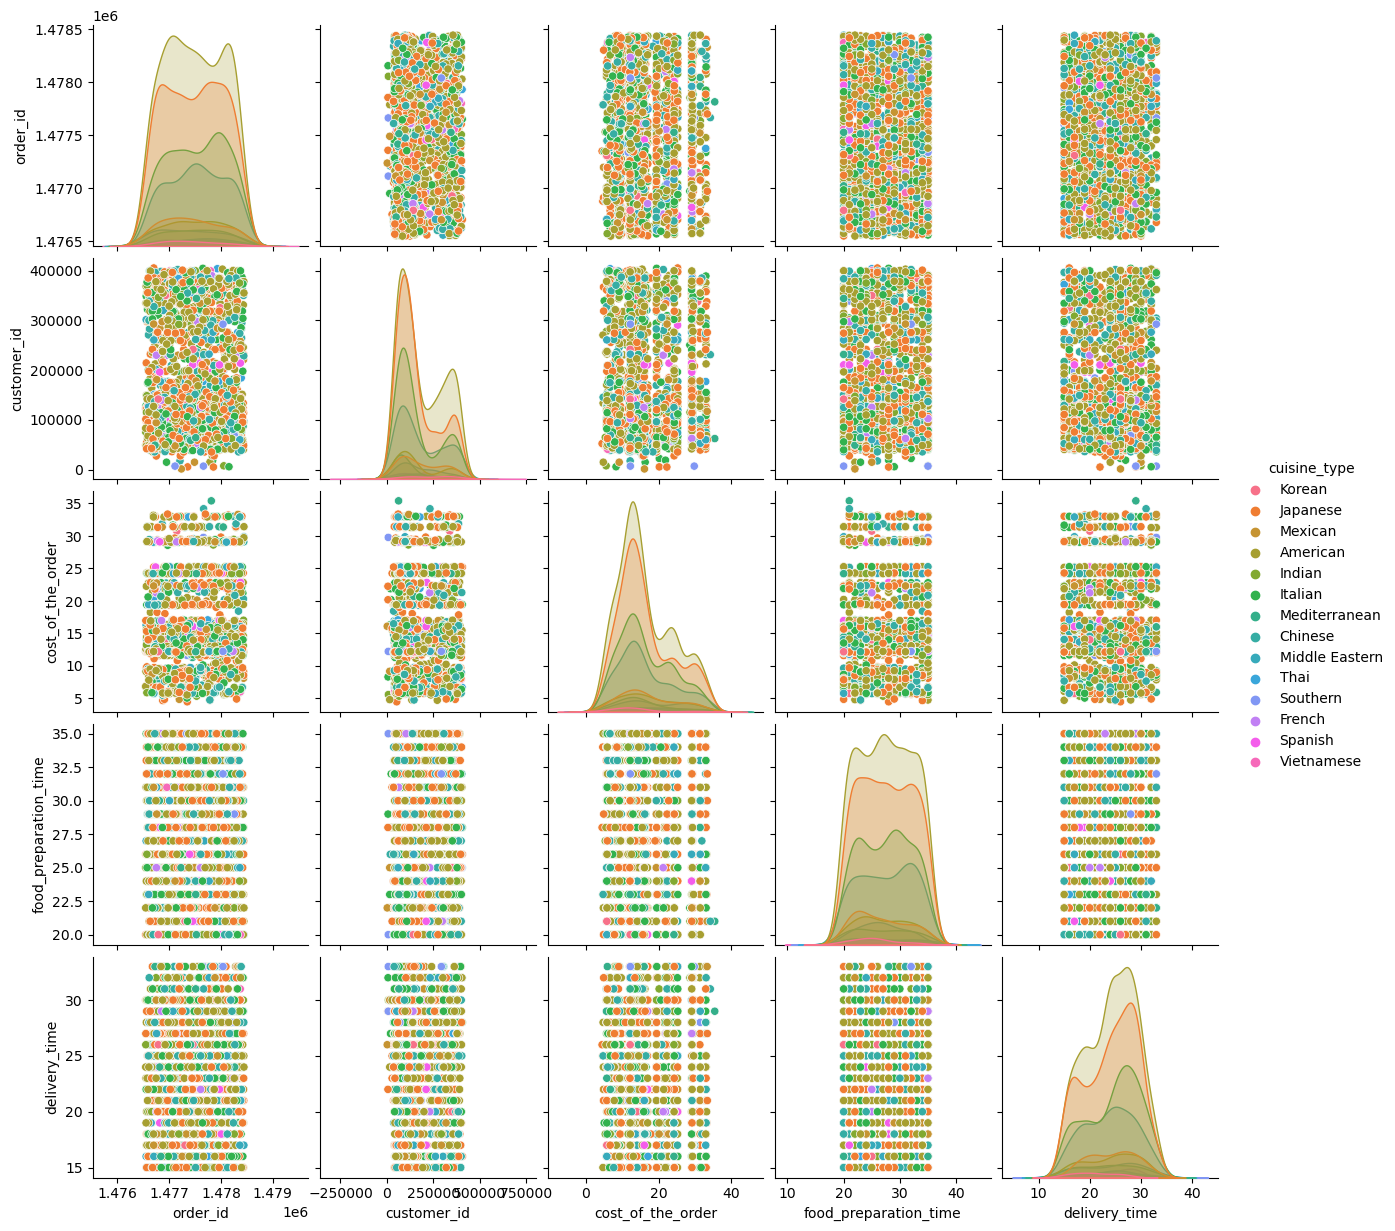

In [ ]:
plt.figure(figsize=(10, 6))
sns.pairplot(df, hue='cuisine_type')
plt.show()

###### Q12.7 Observations:
Checking if there is Relationships between all numerical variables and how they are distributed across categories of a categorical variable

*   No Correlation, but we need to do this for all datasets to check if there are any relationships.





##### Q12.8 Top 5 customers ordered from which cusine type

In [ ]:

# Step 1: Count orders for each customer
customer_order_counts = df['customer_id'].value_counts()

# Step 2: Identify the top 5 customers
top_5_customers = customer_order_counts.head(5).index.tolist()

# Step 3: Filter the original dataframe for these top 5 customers and get their cuisine types
top_5_customers_cuisines = df[df['customer_id'].isin(top_5_customers)]

# Displaying the cuisine types ordered by the top 5 customers
# Here we group by customer_id and cuisine_type and count the orders
top_5_customers_cuisine_types = top_5_customers_cuisines.groupby(['customer_id', 'cuisine_type']).size().reset_index(name='order_count')

# Sort the results to see the most ordered cuisine types for each top customer
top_5_customers_cuisine_types_sorted = top_5_customers_cuisine_types.sort_values(by=['customer_id', 'order_count'], ascending=[True, False])

top_5_customers_cuisine_types_sorted


,customer_id,cuisine_type,order_count
0,47440,American,10
5,52832,Japanese,3
2,52832,Chinese,2
4,52832,Indian,2
8,52832,Middle Eastern,2
1,52832,American,1
3,52832,French,1
6,52832,Korean,1
7,52832,Mexican,1
9,83287,American,4


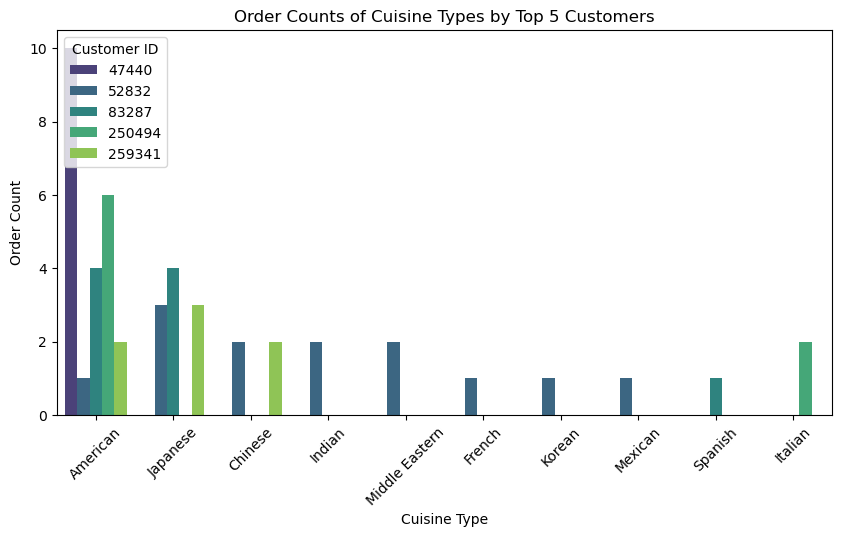

In [ ]:
plt.figure(figsize=(10, 5))

# Plotting
sns.barplot(data=top_5_customers_cuisine_types_sorted, x='cuisine_type', y='order_count', hue='customer_id', palette='viridis')

plt.title('Order Counts of Cuisine Types by Top 5 Customers')
plt.xlabel('Cuisine Type')
plt.ylabel('Order Count')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend(title='Customer ID')

plt.show()

###### Q12.8 Observations:
Trying to see if there are any correlations via heatmap

*   Customer 47440 - Ordered from American Cusine Type (American(10))
*   Customer 52832 - Ordered from Mutileple Cusines Types (Japanese(3), Chinese(2), Indian(2), Middle Eastern(2), American(1), French(1), Korean(1), Mexican(1))
*   Customer 83287 - Ordered from only 3 Cusine Types (American(4), Japanese(4), Spanish(1)
*   Customer 250494 - Ordered from only 2 Cusine Types (American(6), Italian(2))
*   Customer 259341 - Ordered from only 3 Cusine Types (American(3), Japanese(3), Chinese(2)

Recommendations:

*   Taget the top customer with adds and cupons of their already ordered cusine types, so that the sales can increase more as they already like these cusines.
*   Customer 47440 - Ordered 10 from Only American Cusine Type, this data may skewe the data little bit, keep a watch on it.





##### Q12.9 Cusine Type Popularity Among Top 5 Customers

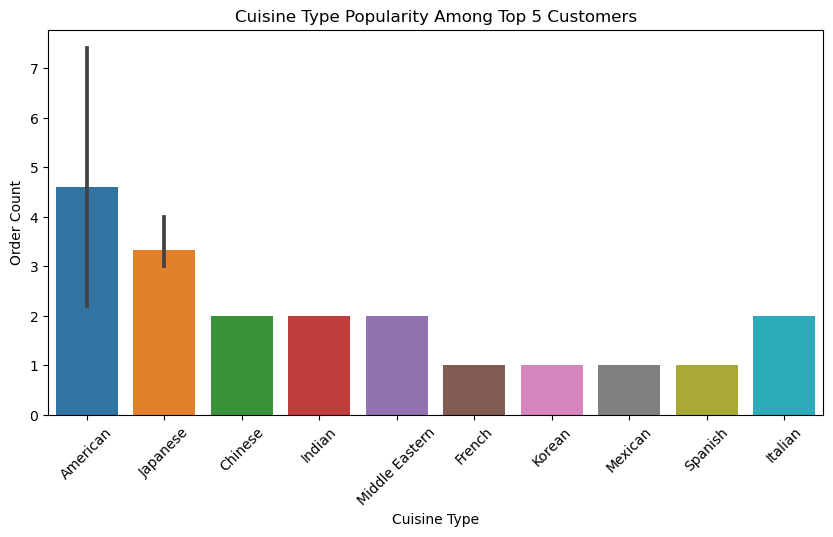

In [ ]:
## @title Cuisine Type Popularity Among Top 5 Customers

plt.figure(figsize=(10, 5))
sns.barplot(x = 'cuisine_type', y = 'order_count', data = top_5_customers_cuisine_types_sorted)
plt.xticks(rotation=45)
plt.title('Cuisine Type Popularity Among Top 5 Customers')
plt.xlabel('Cuisine Type')
plt.ylabel('Order Count')
plt.show()

###### Q12.9 Observations:

*   Top 5 customers have more orders in American and Japanese cusine type



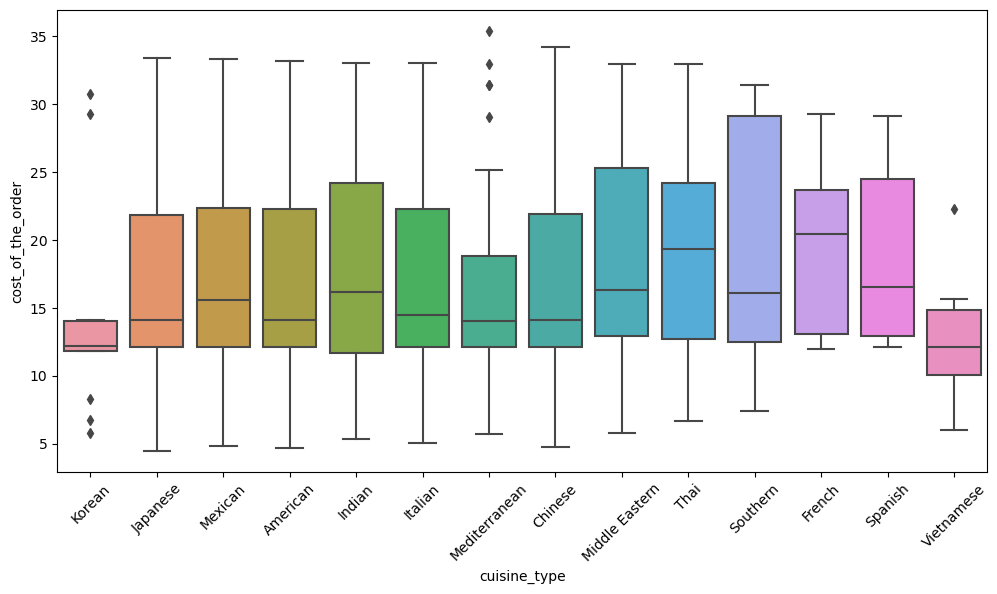

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.xticks(rotation=45)
plt.show()


####### Q12.9 Observations:

- Korean, Mediterranean and Vietnamese has outliers.
- Southern has most range of cost.




##### Q12.10 Violin Plots for a Deeper Dive - CusineType vs DeliveryType

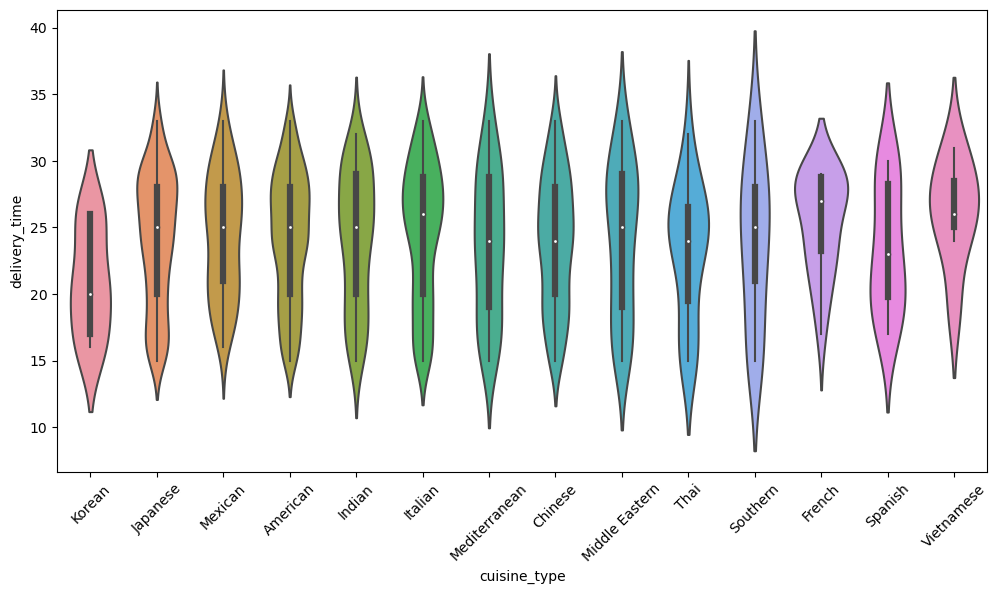

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='cuisine_type', y='delivery_time', data=df)
plt.xticks(rotation=45)
plt.show()


###### Q12.10 Observations:

*   There is no major correlations



##### Q12.11 Heatmap - Correlation with all numerical values

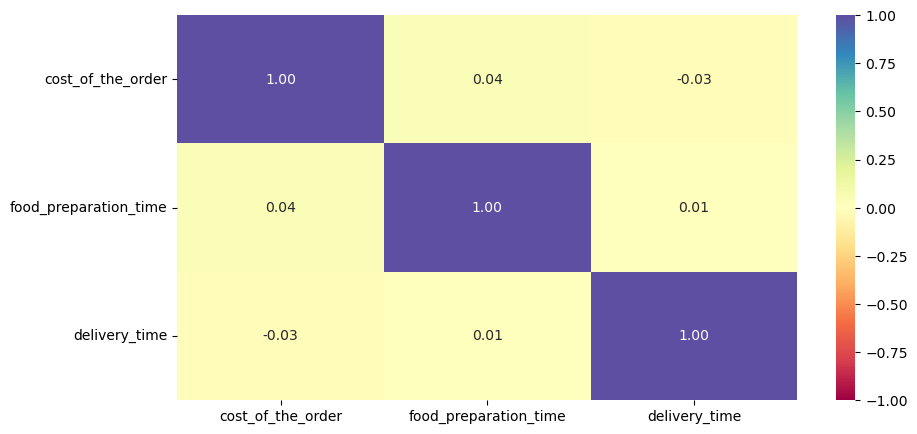

In [ ]:
#Correlation between all numerical values

plt.figure(figsize=(10,5))
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral");
plt.show()

###### Q12.11 Observations:

*   There is no significant Correlation as most of the correlations are below 0.05




##### Q12.12 Revenue by top 15 restaurents

In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(15)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Momoya                            492.13
Name: cost_of_the_order, dtype: float64

###### Q12.12 Observations:

*   Above is the list of top 15 most revenue generating restaurents.
*   Shake Shack is on top in revenue generation.



##### Q12.13 In American Cuisine Type which are the top 5 restaurants ?

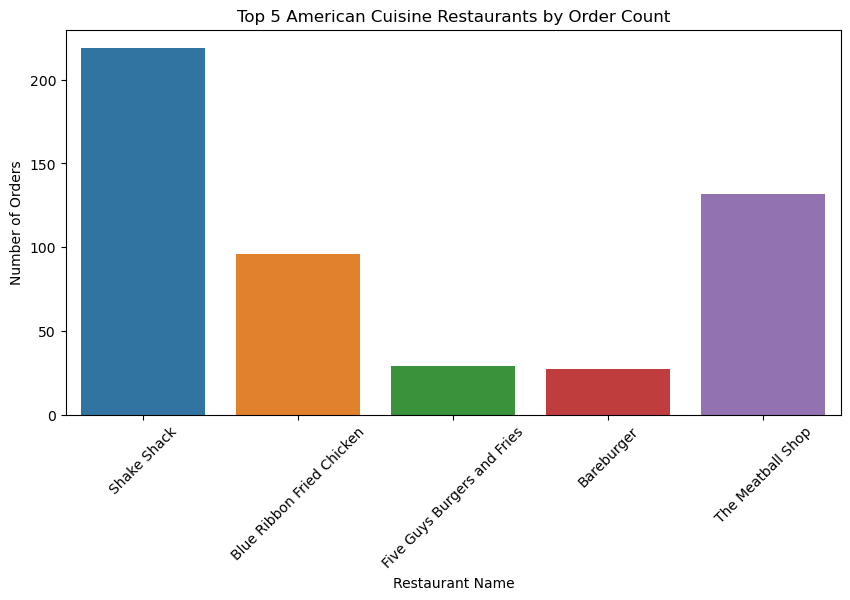

In [ ]:

# Step 1: Filter and identify top 5 American restaurants in one go
top_5_american_restaurants = df[df['cuisine_type'] == 'American']['restaurant_name'].value_counts().head(5)

# Step 2: Directly use the result to filter the original DataFrame and plot
# This avoids the need for explicitly creating a filtered DataFrame for American cuisine
plt.figure(figsize=(10, 5))
sns.countplot(data=df[df['restaurant_name'].isin(top_5_american_restaurants.index)],
              x='restaurant_name',
              order=top_5_american_restaurants.index
              )
              #,
              #palette='viridis')

plt.title('Top 5 American Cuisine Restaurants by Order Count')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

###### Q12.13 Observations:

*   In American Cusine Type the most popular restaurant is "Shake Shack"




##### Q12.14 Top 10 customers gave what rating per cusine_type ?

In [ ]:

# Replace 'Not given' with np.nan and convert to 'Int64' (pandas nullable integer type)
df['rating_int'] = df['rating'].replace('Not given', np.nan).astype(float).astype('Int64')

# Identify the top five customers based on the number of orders
top_customers = df['customer_id'].value_counts().nlargest(10).index

# Filter the DataFrame to only include orders from these top five customers
top_customers_df = df[df['customer_id'].isin(top_customers)]

# Group by customer ID and cuisine type, then calculate the average rating using 'rating_int'
ratings_per_cuisine = top_customers_df.groupby(['customer_id', 'cuisine_type'])['rating_int'].mean().reset_index(name='average_rating')

# Sort the result for better readability
sorted_ratings_per_cuisine = ratings_per_cuisine.sort_values(by=['customer_id', 'average_rating'], ascending=[True, False])

sorted_ratings_per_cuisine

,customer_id,cuisine_type,average_rating
0,47440,American,3.857143
4,52832,Indian,5.0
5,52832,Japanese,5.0
1,52832,American,4.0
8,52832,Middle Eastern,3.5
2,52832,Chinese,3.0
3,52832,French,<NA>
6,52832,Korean,<NA>
7,52832,Mexican,<NA>
10,65009,Indian,5.0


In [ ]:

# Assuming 'sorted_ratings_per_cuisine' is already calculated as previously described
# Create a larger plot
plt.figure(figsize=(10, 5))

# Plotting
sns.barplot(data=sorted_ratings_per_cuisine, x='cuisine_type', y='average_rating', hue='customer_id', palette='viridis')

# Improve plot aesthetics and readability
plt.title('Average Rating per Cuisine Type by Top 10 Customers')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

plt.legend(title='Customer ID', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot

plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


###### Q12.14 Observations:

*   Top 10 customers gave ave 4 rating



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:

# Make a copy so that original df is intact.
df_rating_int = df.copy()

#Replace 'Not given' with np.nan
df_rating_int['rating'].replace('Not given', np.nan, inplace=True)

#Convert 'rating' column to numeric, then to integer where possible
df_rating_int['rating'] = pd.to_numeric(df_rating_int['rating'], errors='coerce')  # Convert to float with NaN for errors
df_rating_int.dropna(subset=['rating'], inplace=True)  # Optional: Drop rows where 'rating' is NaN before conversion to int
df_rating_int['rating'] = df_rating_int['rating'].astype(int)  # Convert to int, assuming now all are valid numeric values

#Group by 'restaurant_name', calculate metrics, and filter
restaurant_ratings = df_rating_int.groupby('restaurant_name')['rating'].agg(count='size', mean='mean').reset_index()
eligible_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]

eligible_restaurants


,restaurant_name,count,mean
16,Blue Ribbon Fried Chicken,64,4.328125
17,Blue Ribbon Sushi,73,4.219178
117,Shake Shack,133,4.278195
132,The Meatball Shop,84,4.511905


#### Q13 Observations:
4 restaurents qualify
*   Blue Ribbon Fired Chicken
*   Blue Ribbon Sushi
*   Shake Shack
*   The Meatball Shop






### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Function to calculate Charge 25% for cost > 20 and 15% for cost > 5
def calculate_charge(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0

# Calcuate Company Charge per order.
df['company_charge'] = df['cost_of_the_order'].apply(calculate_charge)

# Sum all to get total
net_revenue = df['company_charge'].sum()

# Print in $ value
print(f"Net Revenue Generated by the Company: ${net_revenue:,.2f}")

Net Revenue Generated by the Company: $6,166.30


#### Q14 Observations:


*   Net Revenue Generated by the Company: **$6,166.30**





### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
# Calculate the total delivery time for each order
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

# Find the number of orders that take more than 60 minutes
orders_over_60_min = df[df['total_delivery_time'] > 60].shape[0]

# Calculate the percentage of orders over 60 minutes
total_orders = df.shape[0]
percentage_over_60_min = round((orders_over_60_min / total_orders) * 100, 2)

print("Percentage of Orders more than 60mins: ",percentage_over_60_min, "%", sep='')

Percentage of Orders more than 60mins: 10.54%


#### Q15 Observations:

*   Percentage of Orders more than 60mins is **10.54%**
*   List item




### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
# Group by 'day_of_the_week' and calculate the mean delivery time for each group
mean_delivery_time_by_day = round(df.groupby('day_of_the_week')['delivery_time'].mean(),2)

mean_delivery_time_by_day


day_of_the_week
Weekday    28.34
Weekend    22.47
Name: delivery_time, dtype: float64

#### Q16 Observations:

Mean Delivery Time During
*   Weekday: 28.34 mins
*   Weekend: 22.47 mins




### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

The leading five restaurants, ranked by order volume and revenue, include Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm. The most favored cuisines among patrons are American, Japanese, Italian, and Chinese. French cuisine commands the highest average order price, whereas Korean and Vietnamese cuisines are among the most affordable.

Key insights:

- The average time to prepare food across various cuisines ranges from 25 to 28 minutes.
- Delivery durations tend to be longer on weekdays than on weekends.
- A direct relationship exists between food preparation time and order cost, indicating that orders with higher prices generally take longer to prepare.
- Similarly, a positive correlation between order cost and ratings suggests that pricier orders often receive better reviews.
- With 1200 unique customers and 178 restaurants, there's ample scope for expansion in both the customer base and restaurant partnerships.
- The spike in weekend orders points to opportunities for targeted promotions to elevate weekday sales and refine weekend pricing strategies for increased profits.
- Personalized promotions for top customers, based on their preferred types of cuisine, could lead to more repeat business.
- Adding more American cuisine options could cater to the strong demand for this type of food.
- Only 10.54% of orders are delivered within 60 minutes, indicating potential improvements in food preparation and delivery speed.
- The fact that 38.78% of customers have not left ratings calls for enhanced feedback methods to secure more detailed customer feedback.

### Recommendations:

- Launch campaigns to attract additional customers by offering free delivery or discounts on first orders, aiming to increase the current customer base of 1200.
- Expand restaurant partnerships, especially by adding more establishments that serve American cuisine, due to its high demand among FoodHub users.
- Introduce special deals and promotions during weekdays to lift order volumes, and consider implementing premium pricing on weekends to optimize revenue.
- Offer personalized ads and discounts to loyal customers for their preferred cuisine types to encourage repeat orders and potentially increase the frequency of purchases.
- Work on reducing the time it takes for food preparation and delivery, especially for orders exceeding 60 minutes, to enhance customer satisfaction and operational efficiency.
- Enhance the process for collecting feedback, encouraging more customers to rate their orders to address the 38.78% of orders currently unrated.
- Consider reminders or incentives for leaving feedback.
- Develop strategies to improve delivery efficiency during weekdays, when delivery times are longer, to better balance the workload and improve service quality.
- Leverage the high demand on weekends by offering targeted promotions for popular restaurants and cuisines, aiming to drive additional revenue.
- Explore methods to reduce weekday delivery times, through operational improvements or incentives for faster service, to boost customer satisfaction and stay competitive.








---